<a href="https://colab.research.google.com/github/sahanirambukpitiya/Client-Subscription/blob/main/Solution_174128V_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_set = pd.read_csv('/content/gdrive/My Drive/ANN/Data/bank-additional-full.csv',sep=';')
data_set.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data_set.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df = pd.DataFrame(data_set, columns=data_set.columns)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info

<bound method DataFrame.info of        age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]>

In [ ]:
# calculate duplicates
duplicates = df.duplicated()
print(duplicates.any())

True


In [ ]:
# display the duplicate rows
print(df[duplicates])

       age          job   marital  ... euribor3m nr.employed    y
1266    39  blue-collar   married  ...     4.855      5191.0   no
12261   36      retired   married  ...     4.966      5228.1   no
14234   27   technician    single  ...     4.962      5228.1   no
16956   47   technician  divorced  ...     4.962      5228.1   no
18465   32   technician    single  ...     4.968      5228.1   no
20216   55     services   married  ...     4.965      5228.1   no
20534   41   technician   married  ...     4.966      5228.1   no
25217   39       admin.   married  ...     4.153      5195.8   no
28477   24     services    single  ...     1.423      5099.1   no
32516   35       admin.   married  ...     1.313      5099.1   no
36951   45       admin.   married  ...     1.072      5076.2  yes
38281   71      retired    single  ...     0.742      5017.5   no

[12 rows x 21 columns]


In [ ]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
# reset indexes 
df = df.reset_index(drop=True)

In [ ]:
df.shape

(41176, 21)

In [ ]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [ ]:
# Check whether any missing values are available
df.isnull().values.any()

False

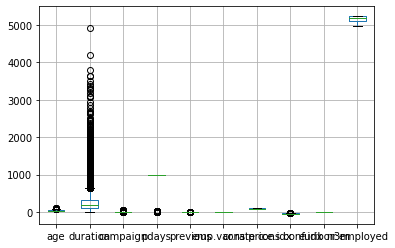

In [ ]:
# check for outliers
df.boxplot()

In [ ]:
# get the numerical columns from the dataset
numerical_df = df.select_dtypes(include=np.number)
numerical_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
# remove the 'duration' column
numerical_df = numerical_df.drop('duration', axis=1)
# get the information about numerical columns
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   campaign        41176 non-null  int64  
 2   pdays           41176 non-null  int64  
 3   previous        41176 non-null  int64  
 4   emp.var.rate    41176 non-null  float64
 5   cons.price.idx  41176 non-null  float64
 6   cons.conf.idx   41176 non-null  float64
 7   euribor3m       41176 non-null  float64
 8   nr.employed     41176 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [ ]:
numerical_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


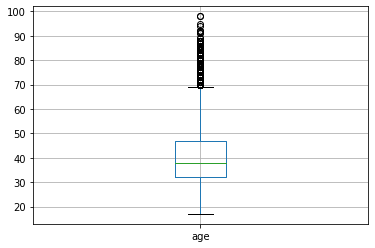

In [ ]:
# Check any outliers in the dataset under age
temp_df = pd.DataFrame(numerical_df['age'])
temp_df.boxplot()

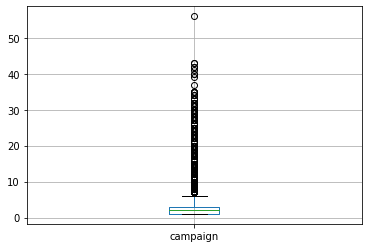

In [ ]:
# Check any outliers in the dataset under campaign
temp_df = pd.DataFrame(numerical_df['campaign'])
temp_df.boxplot()

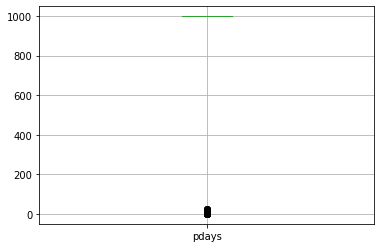

In [ ]:
# Check any outliers in the dataset under pdays
temp_df = pd.DataFrame(numerical_df['pdays'])
temp_df.boxplot()

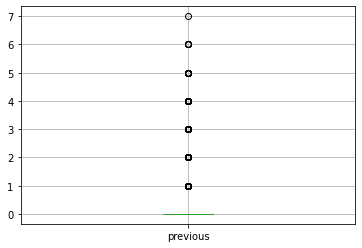

In [ ]:
# Check any outliers in the dataset under previous
temp_df = pd.DataFrame(numerical_df['previous'])
temp_df.boxplot()

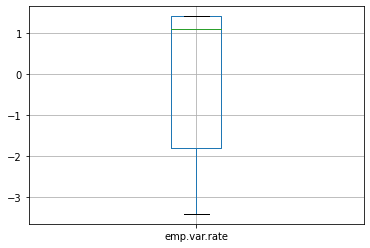

In [ ]:
# Check any outliers in the dataset under emp.var.rate
temp_df = pd.DataFrame(numerical_df['emp.var.rate'])
temp_df.boxplot()

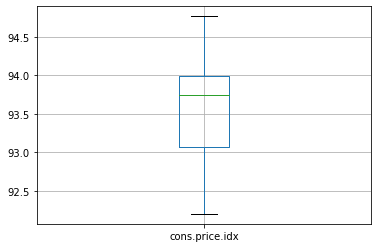

In [ ]:
# Check any outliers in the dataset under cons.price.idx
temp_df = pd.DataFrame(numerical_df['cons.price.idx'])
temp_df.boxplot()

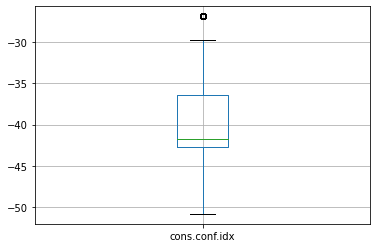

In [ ]:
# Check any outliers in the dataset under cons.conf.idx
temp_df = pd.DataFrame(numerical_df['cons.conf.idx'])
temp_df.boxplot()

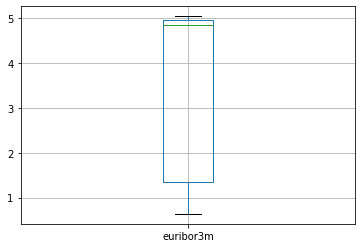

In [ ]:
# Check any outliers in the dataset under euribor3m
temp_df = pd.DataFrame(numerical_df['euribor3m'])
temp_df.boxplot()

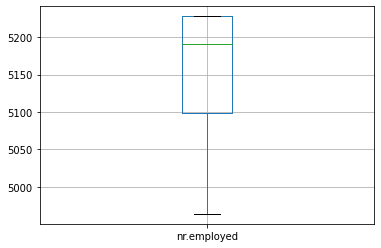

In [ ]:
# Check any outliers in the dataset under nr.employed
temp_df = pd.DataFrame(numerical_df['nr.employed'])
temp_df.boxplot()

In [ ]:
# dropping outliers
df2 =numerical_df.drop(numerical_df[numerical_df['cons.conf.idx'] > -30].index)
print("Before Shape:",numerical_df.shape)
print("After Shape:",df2.shape)

# no outliers to drop

Before Shape: (41176, 9)
After Shape: (40463, 9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce217f5ed0>,
      dtype=object)

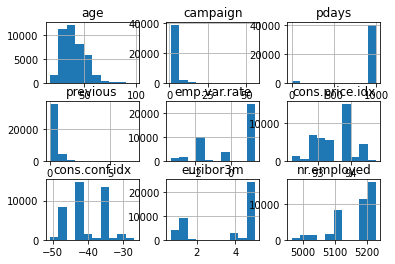

In [ ]:
#Check any Transformations are required for the dataset
numerical_df.hist()

In [ ]:
numerical_df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

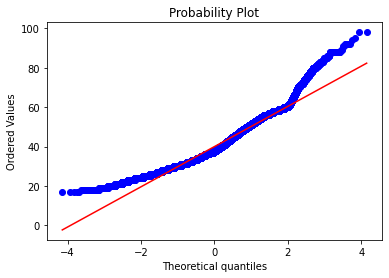

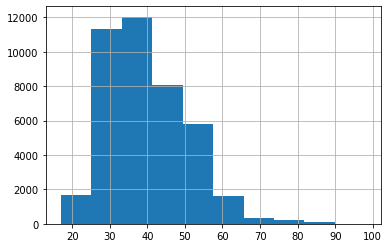

In [ ]:
# Q-Q Plot and Histogram - age
stats.probplot(numerical_df['age'], dist="norm", plot=plt);plt.show();
numerical_df['age'].hist();

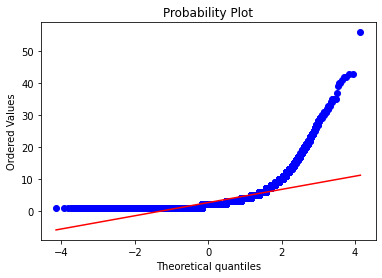

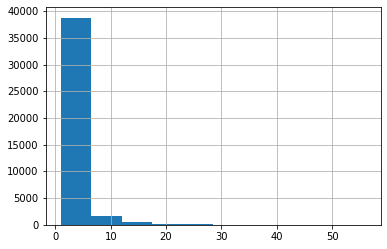

In [ ]:
# Q-Q Plot and Histogram - campaign
stats.probplot(numerical_df['campaign'], dist="norm", plot=plt);plt.show();
numerical_df['campaign'].hist();

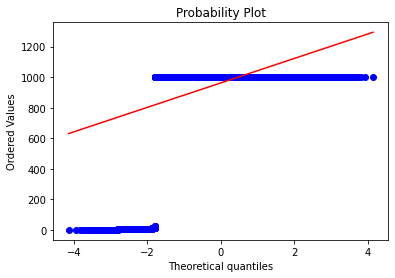

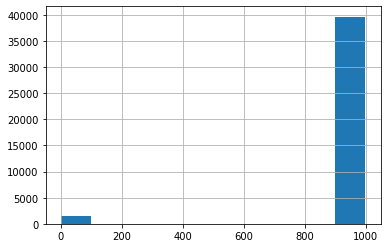

In [ ]:
# Q-Q Plot and Histogram - pdays
stats.probplot(numerical_df['pdays'], dist="norm", plot=plt);plt.show();
numerical_df['pdays'].hist();

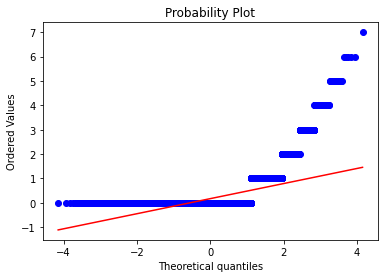

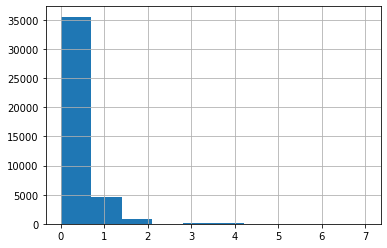

In [ ]:
# Q-Q Plot and Histogram - previous
stats.probplot(numerical_df['previous'], dist="norm", plot=plt);plt.show();
numerical_df['previous'].hist();

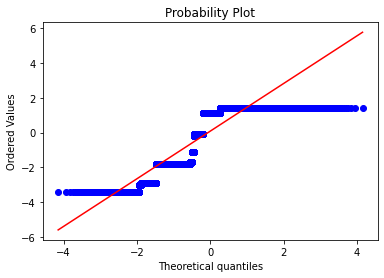

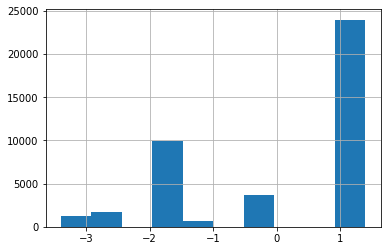

In [ ]:
# Q-Q Plot and Histogram - emp.var.rate
stats.probplot(numerical_df['emp.var.rate'], dist="norm", plot=plt);plt.show();
numerical_df['emp.var.rate'].hist();

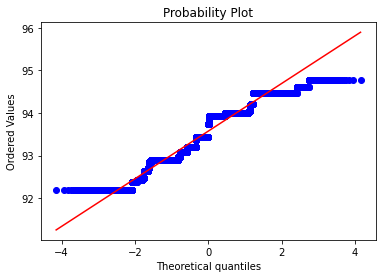

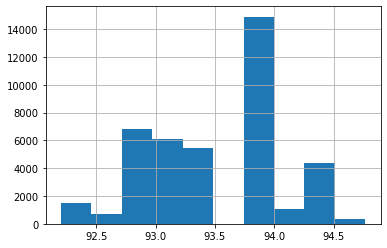

In [ ]:
# Q-Q Plot and Histogram - cons.price.idx
stats.probplot(numerical_df['cons.price.idx'], dist="norm", plot=plt);plt.show();
numerical_df['cons.price.idx'].hist();

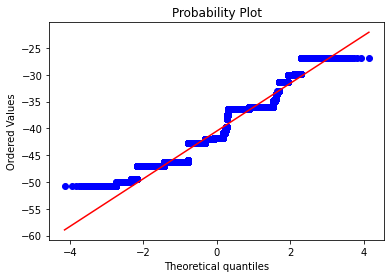

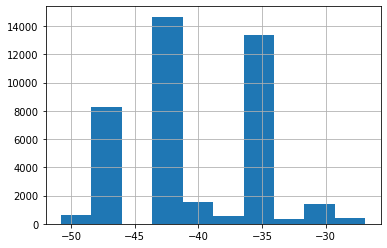

In [ ]:
# Q-Q Plot and Histogram - cons.conf.idx
stats.probplot(numerical_df['cons.conf.idx'], dist="norm", plot=plt);plt.show();
numerical_df['cons.conf.idx'].hist();

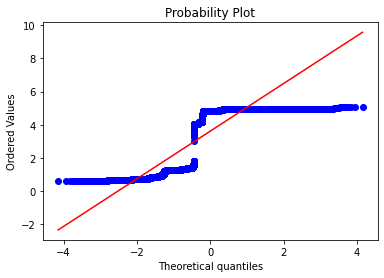

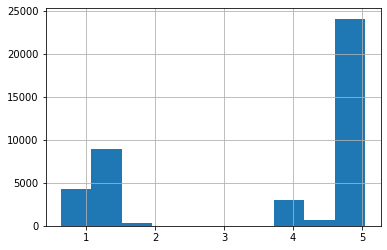

In [ ]:
# Q-Q Plot and Histogram - euribor3m
stats.probplot(numerical_df['euribor3m'], dist="norm", plot=plt);plt.show();
numerical_df['euribor3m'].hist();

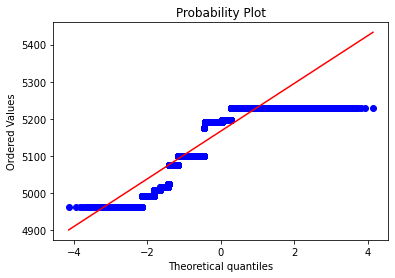

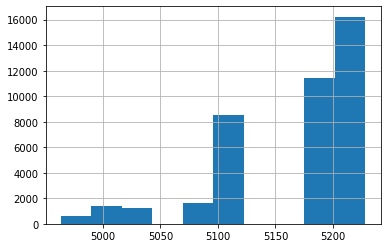

In [ ]:
# Q-Q Plot and Histogram - nr.employed
stats.probplot(numerical_df['nr.employed'], dist="norm", plot=plt);plt.show();
numerical_df['nr.employed'].hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce20daa490>,
      dtype=object)

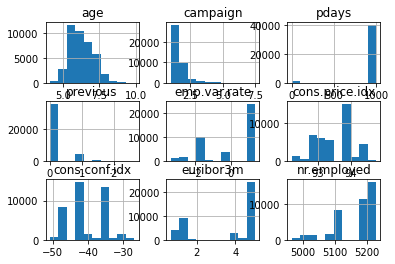

In [ ]:
# do the transformations for right skewed features

# create columns variables to hold the columns that need transformation
columns = ['age', 'campaign', 'previous']

# create the function transformer object with logarithm transformation
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation 
data_new = sqrt_transformer.transform(numerical_df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
numerical_df['age'] = df_new['age']
numerical_df['campaign'] = df_new['campaign']
numerical_df['previous'] = df_new['previous']

numerical_df.hist()

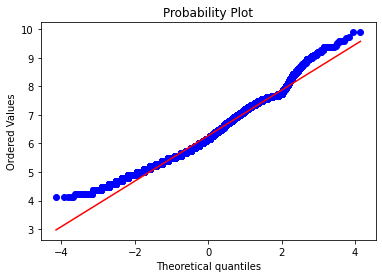

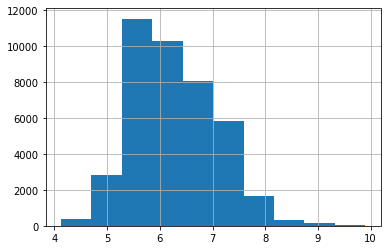

In [ ]:
# Q-Q Plot and Histogram - age
stats.probplot(numerical_df['age'], dist="norm", plot=plt);plt.show();
numerical_df['age'].hist();

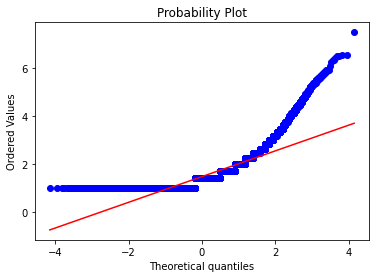

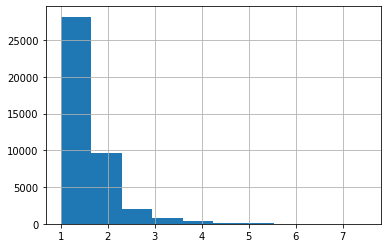

In [ ]:
# Q-Q Plot and Histogram - campaign
stats.probplot(numerical_df['campaign'], dist="norm", plot=plt);plt.show();
numerical_df['campaign'].hist();

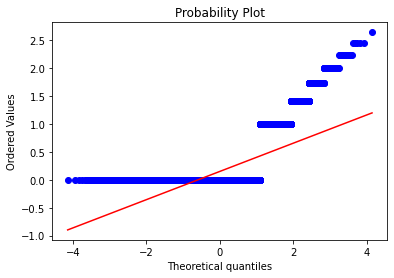

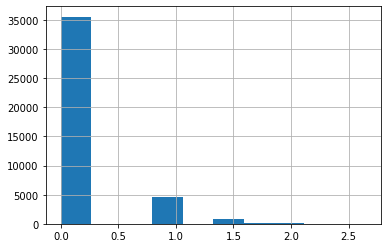

In [ ]:
# Q-Q Plot and Histogram - previous
stats.probplot(numerical_df['previous'], dist="norm", plot=plt);plt.show();
numerical_df['previous'].hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce20732b90>,
      dtype=object)

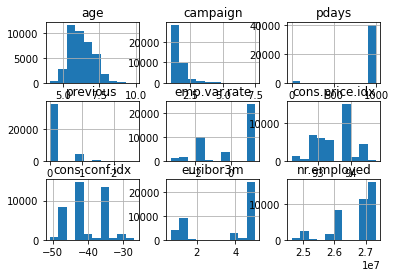

In [ ]:
# apply transformations for left skewed distributions
columns = ['nr.employed']
# exponential transformation
powered_transformer = FunctionTransformer(lambda x: x ** 2, validate=True) 
# apply the transformation 
exp_data = powered_transformer.transform(numerical_df[columns])
exp_df = pd.DataFrame(exp_data, columns=columns)
# replace new values with previous data frame
numerical_df['nr.employed'] = exp_df['nr.employed']
numerical_df.hist()

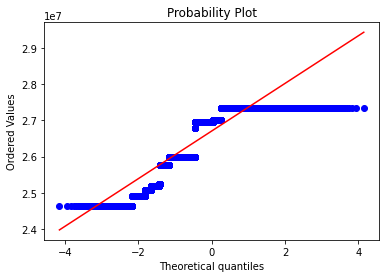

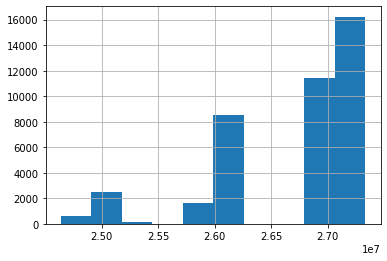

In [ ]:
# Q-Q Plot and Histogram - nr.employed
stats.probplot(numerical_df['nr.employed'], dist="norm", plot=plt);plt.show();
numerical_df['nr.employed'].hist();

In [ ]:
# identify the categorical columns
categorical_df = df.select_dtypes(exclude=np.number)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41176 non-null  object
 1   marital      41176 non-null  object
 2   education    41176 non-null  object
 3   default      41176 non-null  object
 4   housing      41176 non-null  object
 5   loan         41176 non-null  object
 6   contact      41176 non-null  object
 7   month        41176 non-null  object
 8   day_of_week  41176 non-null  object
 9   poutcome     41176 non-null  object
 10  y            41176 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [ ]:
# apply one-hot-encoder to categorical features
cat_cols = categorical_df.columns
cat_cols = cat_cols.drop('y')
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(categorical_df[cat_cols])
coded_cols = onehot_encoder.get_feature_names(cat_cols)

onehot_encoder_df = pd.DataFrame(onehot_encoder.transform(categorical_df[cat_cols]).toarray(),columns=coded_cols)
categorical_df = categorical_df.join(onehot_encoder_df)
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job                            41176 non-null  object 
 1   marital                        41176 non-null  object 
 2   education                      41176 non-null  object 
 3   default                        41176 non-null  object 
 4   housing                        41176 non-null  object 
 5   loan                           41176 non-null  object 
 6   contact                        41176 non-null  object 
 7   month                          41176 non-null  object 
 8   day_of_week                    41176 non-null  object 
 9   poutcome                       41176 non-null  object 
 10  y                              41176 non-null  object 
 11  job_admin.                     41176 non-null  float64
 12  job_blue-collar                41176 non-null 

In [ ]:
# drop the categorical columns 
categorical_df.drop(cat_cols, axis=1, inplace=True)
categorical_df.head(10)

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# join the data frames
new_df = categorical_df.join(numerical_df)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   y                              41176 non-null  object 
 1   job_admin.                     41176 non-null  float64
 2   job_blue-collar                41176 non-null  float64
 3   job_entrepreneur               41176 non-null  float64
 4   job_housemaid                  41176 non-null  float64
 5   job_management                 41176 non-null  float64
 6   job_retired                    41176 non-null  float64
 7   job_self-employed              41176 non-null  float64
 8   job_services                   41176 non-null  float64
 9   job_student                    41176 non-null  float64
 10  job_technician                 41176 non-null  float64
 11  job_unemployed                 41176 non-null  float64
 12  job_unknown                    41176 non-null 

In [ ]:
# drop the 'y' column 
df_features = new_df.drop('y',axis=1)
target = pd.DataFrame(new_df['y'], columns=["y"])
# apply the coding
target['y'] = target['y'].astype('category').cat.codes

In [ ]:
# split into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(df_features, target, test_size = 0.2, random_state = 101)

x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [ ]:
# scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe52508bed0>,
      dtype=object)

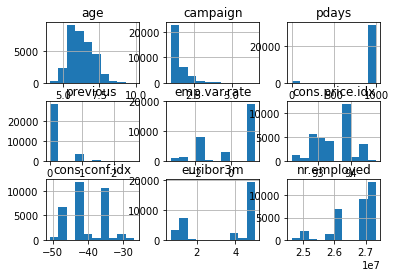

In [ ]:
cols_scaled = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
x_train[cols_scaled].hist()

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
pdays,1.000000,-0.554058,0.268222,0.078129,-0.089872,0.294127,0.367400,-0.318128
previous,-0.554058,1.000000,-0.459710,-0.265907,-0.076937,-0.483186,-0.507735,0.213283
emp.var.rate,0.268222,-0.459710,1.000000,0.775446,0.203727,0.972294,0.908922,-0.291681
cons.price.idx,0.078129,-0.265907,0.775446,1.000000,0.064731,0.688583,0.525636,-0.133420
cons.conf.idx,-0.089872,-0.076937,0.203727,0.064731,1.000000,0.285228,0.110230,0.054578
euribor3m,0.294127,-0.483186,0.972294,0.688583,0.285228,1.000000,0.946399,-0.301043
nr.employed,0.367400,-0.507735,0.908922,0.525636,0.110230,0.946399,1.000000,-0.346677
y,-0.318128,0.213283,-0.291681,-0.133420,0.054578,-0.301043,-0.346677,1.000000


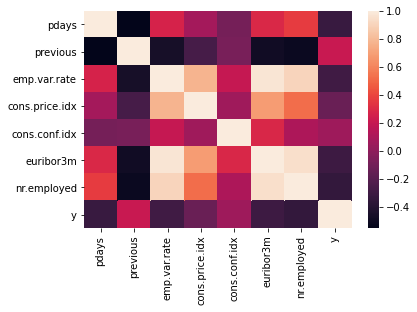

In [ ]:
# draw the correlation matrix
correlation_matrix = pd.concat([x_train.iloc[:,55:], y_train], axis=1).corr()
sns.heatmap(correlation_matrix)
correlation_matrix

In [ ]:
# apply the PCA for feature reduction
pca = PCA()
pca.fit(x_train)
pca.explained_variance_ratio_

array([9.99999945e-01, 5.44945579e-08, 3.81771648e-11, 1.76804615e-12,
       1.42605282e-12, 8.83986236e-13, 7.86359063e-13, 6.81588294e-13,
       6.15128387e-13, 5.51348548e-13, 5.04572586e-13, 4.82389018e-13,
       4.65978128e-13, 4.23902247e-13, 4.06794620e-13, 3.90720704e-13,
       3.79039408e-13, 3.61053095e-13, 3.56815746e-13, 3.46259068e-13,
       2.64143619e-13, 2.41431817e-13, 2.33459250e-13, 2.10715012e-13,
       2.00524828e-13, 1.48956671e-13, 1.34546556e-13, 1.26852653e-13,
       1.23882222e-13, 1.19776099e-13, 9.80709458e-14, 8.57004996e-14,
       7.99152024e-14, 7.82102703e-14, 6.29827743e-14, 5.96826590e-14,
       4.87873174e-14, 4.44717780e-14, 3.46574689e-14, 3.33622208e-14,
       2.77212024e-14, 2.25469061e-14, 1.63900571e-14, 1.54297844e-14,
       9.14054055e-15, 8.61892115e-15, 5.95275033e-15, 4.68761399e-15,
       3.54746179e-15, 9.47667420e-16, 1.66055526e-16, 9.98002821e-33,
       9.98002821e-33, 9.98002821e-33, 9.98002821e-33, 9.98002821e-33,
      

In [ ]:
pca = PCA(n_components=4)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
# apply the multi layer perceptron for the training dataset
MLP = MLPClassifier(hidden_layer_sizes=(3,),
                    max_iter=500,
                    activation = 'relu',
                    solver='adam',
                    verbose=True,
                    early_stopping=True,
                    validation_fraction=0.2,
                    tol=0.01,
                    learning_rate_init=0.00001,
                    random_state=466
                    )

MLP.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = inf
Validation score: 0.719035
Iteration 2, loss = inf
Validation score: 0.719035
Iteration 3, loss = inf
Validation score: 0.719035
Iteration 4, loss = inf
Validation score: 0.719035
Iteration 5, loss = inf
Validation score: 0.719035
Iteration 6, loss = inf
Validation score: 0.719035
Iteration 7, loss = inf
Validation score: 0.719035
Iteration 8, loss = inf
Validation score: 0.719035
Iteration 9, loss = inf
Validation score: 0.719035
Iteration 10, loss = inf
Validation score: 0.719035
Iteration 11, loss = inf
Validation score: 0.719035
Iteration 12, loss = inf
Validation score: 0.719035
Validation score did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(3,), learning_rate='constant',
              learning_rate_init=1e-05, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=466, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.2, verbose=True,
              warm_start=False)

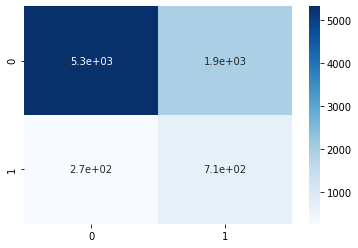

In [ ]:
# draw the confusion matrix
predictions = MLP.predict(x_test_pca)
cnf_matrix = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.show()

In [ ]:
# print the training error and MSE
print("Training error: %f" % MLP.loss_curve_[-1])
print("Training set score: %f" % MLP.score(x_train_pca, y_train))
print("Test set score: %f" % MLP.score(x_test_pca, y_test))
print(accuracy_score(y_test, predictions))
print("MSE: %f" % mean_squared_error(y_test, predictions))

Training error: inf
Training set score: 0.717122
Test set score: 0.731059
0.7310587663914522
MSE: 0.268941


In [ ]:
# number of input features
input_features = x_train_pca.shape[1]
input_features

4

In [ ]:
# define model
model = Sequential()
model.add(Dense(10, activation='sigmoid', kernel_initializer='he_normal', input_shape=(input_features,)))
model.add(Dense(5, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

n_epochs = 50
learning_rate = 0.001
decay_rate = learning_rate /n_epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# compile the model
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(x_train_pca, y_train, epochs=n_epochs, batch_size=32, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#  test accuracy
loss, accuracy = model.evaluate(x_test_pca, y_test, verbose=0)
print('Test Accuracy: %.3f' % accuracy)

Test Accuracy: 0.881
